In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
df = pandas.read_csv('/kaggle/input/covid-world-vaccination-progress/country_vaccinations.csv')
print(df.columns)
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


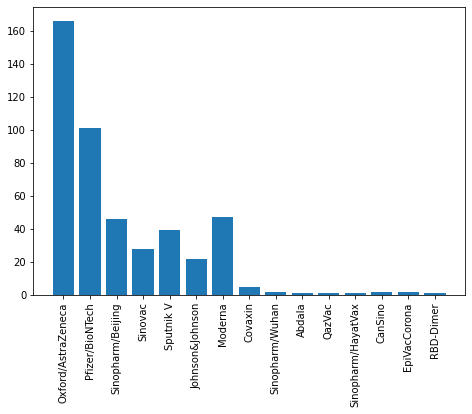

In [10]:
#find the most popular vaccine by country
import pandas
import matplotlib.pyplot as plt
#get data
df = pandas.read_csv('/kaggle/input/covid-world-vaccination-progress/country_vaccinations.csv')
#slice off what we want. the table has each country list all the vaccines it uses in all spots
#so if you just get the distinct vaccine entries you need
df2 = df.drop_duplicates(subset = ["country"])
count = {}
#because some cells have multiple vaccines, we need to split them up to count them
for vac in df2['vaccines']:
    #print(vac)
    for vac2 in vac.split(','):
        #after they're split, sometimes there's a space left over
        vac2 = vac2.lstrip()
        if vac2 in count.keys():
            vac2Count = count.get(vac2) + 1
            count[vac2]= vac2Count
        else:
            count[vac2] = 1
#now we graph it
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])
ax.bar(count.keys(), count.values())
plt.xticks(rotation=90)
plt.show()
        

In [ ]:
#find the change in daily vaccinations
#all this global variable and methods is to save me some time later so that I can simply copy and
#paste rather than manually alter lines of code
global label
global visible
global title
label = -1
visible = -1
title = -1
def lab():
    global label
    label+=1
    return label
def vis():
    global visible
    visible+=1
    return visible
def tit():
    global title
    title+=1
    return title

import pandas
import plotly.graph_objects as go
#get data
df = pandas.read_csv('/kaggle/input/covid-world-vaccination-progress/country_vaccinations.csv')
#slice off what we want
df3 = df[['country','date', 'daily_vaccinations_per_million']]
#fill in nan values
df3['daily_vaccinations_per_million'].fillna(0, inplace=True)
#initialize variables
countryAvg = {}
listing = []
current = df3['country'][0]
#get the data into a dictionary to organize it
for row in range(0, len(df3.index)):
    if current == df3['country'][row]:
        listing.append(df3['date'][row])
        listing.append(df3['daily_vaccinations_per_million'][row])
    else:
        countryAvg[current] = listing
        del listing
        listing = []
        listing.append(df3['date'][row])
        listing.append(df3['daily_vaccinations_per_million'][row])
        current = df3['country'][row]

#because I hate myself I decided to make a dropdown for all graphs, uhhhh why. Well, lets see
#if I can somewhat automate it
fig = go.Figure()
arguments= {}
#in order for the dropdown to work, you need to create a list that specifies the exact trace you
#want to be True, and the rest False. These loops are to automate the creation of those lists
for count, key in enumerate(countryAvg.keys()):
    del listing
    listing = []
    #make the trace
    fig.add_trace(go.Scatter(x = countryAvg.get(key)[0::2], y = countryAvg.get(key)[1::2], mode = 'lines', name= key))
    
    for x in range(0,len(df3.index)):
        #if we reach the element we want to be True it's set to True, all other traces are set False
        if x == count:
            listing.append(True)
        else:
            listing.append(False)
    arguments[key] = listing
        
        
listing = []
#one more graph that shows all traces at once
for x in range(0,len(df3.index)):
        listing.append(True)
arguments['All'] = listing
del listing
#okay, so here's the part where I had to be clever. There's no good way I know of to automate the creation of 
#a custom dropdown list, so I decided to use this "arguments.get(list(arguments.keys())[vis()])"
#what this does is calls the method above that uses a global value that I can manipulate across
#method calls. I could have done something similar by creating an object whose values I could set,
#but this came to mind first. So, the persistent global variables allow me to index through the
#dictionary keys that I typecasted as a list, then use that value as the key to fetch the appropriate
#value. All this allows me to have the same 5 lines of code for each dictionary entry and still
#have it iterate through, thus making it so that I don't have to manually adjust each one for the
#specific country
fig.update_layout(
    updatemenus=[go.layout.Updatemenu(
        active=0,
        buttons=list(
            [dict(label = 'All',
                  method = 'update',
                  args = [{'visible': arguments.get('All')},
                          {'title': 'All',
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}]),
             dict(label = list(countryAvg.keys())[lab()],
                  method = 'update',
                  args = [{'visible': arguments.get(list(arguments.keys())[vis()])}, # the index of True aligns with the indices of plot traces
                          {'title': list(countryAvg.keys())[tit()],
                           'showlegend':True}])
             
             
            ])
        )
    ])

fig.show()

    
    

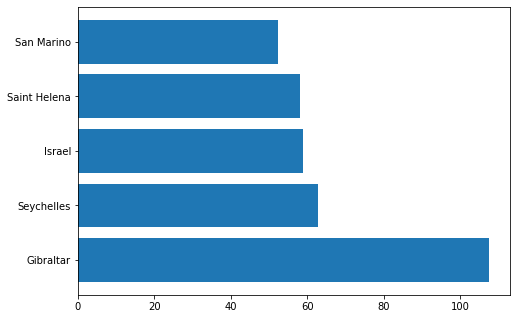

In [9]:
#percentage of people fully vaccinated


import pandas
import matplotlib.pyplot as plt
#get data
df = pandas.read_csv('/kaggle/input/covid-world-vaccination-progress/country_vaccinations.csv')
df2 = df[['country','people_fully_vaccinated_per_hundred']]
df2['people_fully_vaccinated_per_hundred'].fillna(0, inplace=True)
#print(df2)

country = df2['country'][0]
data = {}
for x in range(0,len(df2)):
    countryNext = df2['country'][x]
    if countryNext == country:
        vaccination = df2['people_fully_vaccinated_per_hundred'][x]
    else:
        data[country] = vaccination
        vaccination = df2['people_fully_vaccinated_per_hundred'][x]
        country = countryNext
        
data[country] = vaccination
coun = []
top = {'first': 0, 'second':0, 'third':0, 'fourth':0, 'fifth':0}
for x in data.keys():
    if data.get(x) >= top.get('first'):
        top['fifth'] = top.get('fourth')
        top['fourth'] = top.get('third')
        top['third'] = top.get('second')
        top['second'] = top.get('first')
        top['first'] =  data.get(x)
        coun.insert(0,x)
    elif data.get(x) >= top.get('second'):
        top['fifth'] = top.get('fourth')
        top['fourth'] = top.get('third')
        top['third'] = top.get('second')
        top['second'] = data.get(x)
        coun.insert(1,x)
    elif data.get(x) >= top.get('third'):
        top['fifth'] = top.get('fourth')
        top['fourth'] = top.get('third')
        top['third'] = data.get(x)
        coun.insert(2,x)
    elif data.get(x) >= top.get('fourth'):
        top['fifth'] = top.get('fourth')
        top['fourth'] = data.get(x)
        coun.insert(3,x)
count = [coun[0], coun[1], coun[2], coun[3], coun[4]]
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])
ax.barh(count, top.values())

plt.show()
#Gibraltar shows as being over 100%, clearly there's some funny business going on with the reporting